In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
#读取数据
train_data = pd.read_csv('pfm_train.csv')
test_data = pd.read_csv('pfm_test.csv')

In [3]:
#查看数据
print(train_data.shape)
train_data.head(2)

(1100, 31)


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37,0,Travel_Rarely,Research & Development,1,4,Life Sciences,77,1,Male,2,2,Manufacturing Director,3,Divorced,5993,1,Y,No,18,3,3,80,1,7,2,4,7,5,0,7
1,54,0,Travel_Frequently,Research & Development,1,4,Life Sciences,1245,4,Female,3,3,Manufacturing Director,3,Divorced,10502,7,Y,No,17,3,1,80,1,33,2,1,5,4,1,4


In [4]:
print(test_data.shape)
test_data.head(2)

(350, 30)


,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,40,Non-Travel,Research & Development,9,4,Other,1449,3,Male,3,2,Laboratory Technician,3,Divorced,3975,3,Y,No,11,3,3,80,2,11,2,4,8,7,0,7
1,53,Travel_Rarely,Research & Development,7,2,Medical,1201,4,Female,3,5,Manager,3,Divorced,18606,3,Y,No,18,3,2,80,1,26,6,3,7,7,4,7


In [5]:
#观看标签分类大小
train_data['Attrition'].value_counts()

0    922
1    178
Name: Attrition, dtype: int64

In [6]:
#没有缺失值
data=train_data.append(test_data)
data.info()
print('合并后一共{0}条数据'.format(data.shape[0]))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 349
Data columns (total 31 columns):
Age                         1450 non-null int64
Attrition                   1100 non-null float64
BusinessTravel              1450 non-null object
Department                  1450 non-null object
DistanceFromHome            1450 non-null int64
Education                   1450 non-null int64
EducationField              1450 non-null object
EmployeeNumber              1450 non-null int64
EnvironmentSatisfaction     1450 non-null int64
Gender                      1450 non-null object
JobInvolvement              1450 non-null int64
JobLevel                    1450 non-null int64
JobRole                     1450 non-null object
JobSatisfaction             1450 non-null int64
MaritalStatus               1450 non-null object
MonthlyIncome               1450 non-null int64
NumCompaniesWorked          1450 non-null int64
Over18                      1450 non-null object
OverTime             

In [7]:
#观察可知EmploymentNumber\StandardHors\Over18为无用数据列
#无缺失值以及异常值
data.describe()

,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1450.000000,1100.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.0,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.00000,1450.000000
mean,36.871724,0.161818,9.177241,2.909655,1026.981379,2.722759,2.731724,2.057931,2.731034,6482.624138,2.685517,15.226897,3.154483,2.708276,80.0,0.795172,11.217241,2.801379,2.761379,6.956552,4.220000,2.16000,4.097931
std,9.119033,0.368451,8.085783,1.023925,602.029616,1.090314,0.711068,1.103084,1.103074,4694.115546,2.496457,3.668111,0.361536,1.082390,0.0,0.853752,7.738772,1.292009,0.706588,6.053036,3.617954,3.18867,3.546603
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,30.000000,0.000000,2.000000,2.000000,494.250000,2.000000,2.000000,1.000000,2.000000,2909.500000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.00000,2.000000
50%,36.000000,0.000000,7.000000,3.000000,1023.000000,3.000000,3.000000,2.000000,3.000000,4903.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.00000,3.000000
75%,43.000000,0.000000,14.000000,4.000000,1559.500000,4.000000,3.000000,3.000000,4.000000,8339.750000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,2.75000,7.000000
max,60.000000,1.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.00000,17.000000


In [8]:
#删除无意义列
train_data.drop(columns=['EmployeeNumber','StandardHours','Over18'],inplace=True)
test_data.drop(columns=['EmployeeNumber','StandardHours','Over18'],inplace=True)
data.drop(columns=['EmployeeNumber','StandardHours','Over18'],inplace=True)

## 定类和定序变量分析

In [9]:
#获取定类变量
cat_list=[]
for i in train_data.columns:
    if train_data[i].dtype=='O':
        cat_list.append(i)
for n,i in enumerate(cat_list):
    cat_num=train_data[i].value_counts().index.shape[0]
    print('{0}.{1}特征的类型数量是:{2}'.format(n+1,i,cat_num))

1.BusinessTravel特征的类型数量是:3
2.Department特征的类型数量是:3
3.EducationField特征的类型数量是:6
4.Gender特征的类型数量是:2
5.JobRole特征的类型数量是:9
6.MaritalStatus特征的类型数量是:3
7.OverTime特征的类型数量是:2


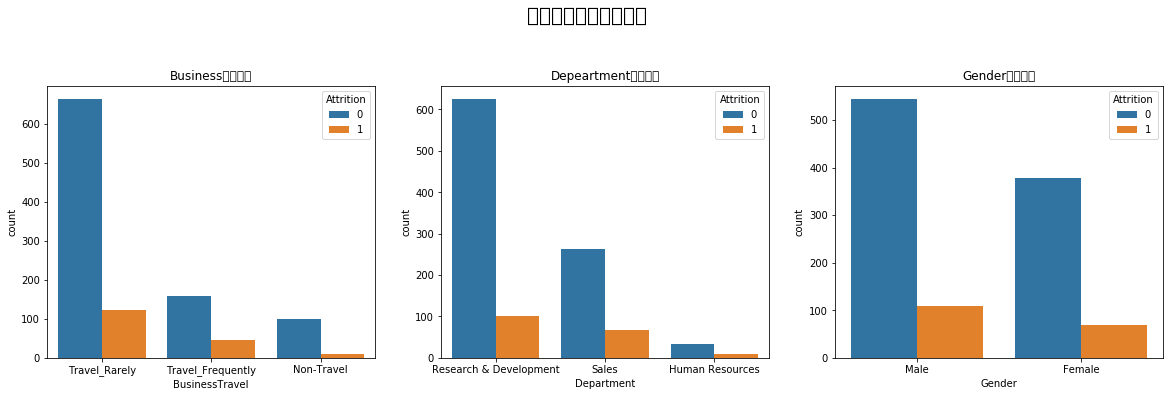

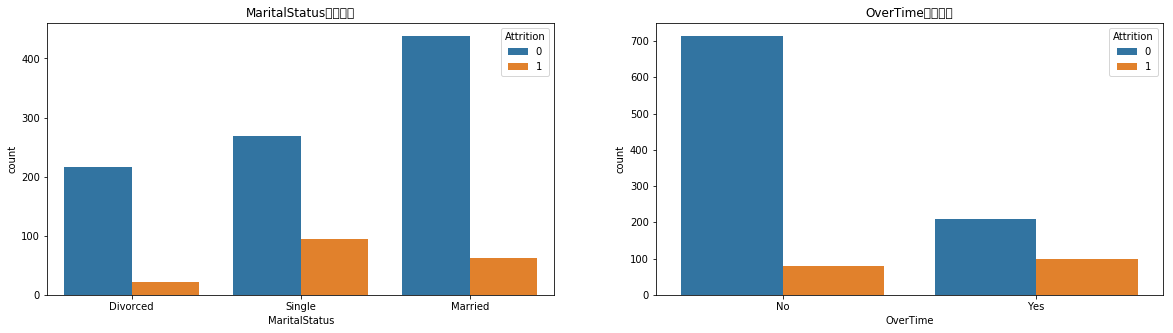

In [10]:
#对各个定类变量分别与标签进行可视化；
#观察可知经常出差的离职率是最高的；研究部门的人数占比最多，但是销售部门的人员流动性更高，即离职率更高；男性且单身的离职率相对较高
f,[ax1,ax2,ax3]=plt.subplots(1,3,figsize=(20,5))
sns.countplot(x='BusinessTravel',hue='Attrition',data=train_data,ax=ax1)
sns.countplot(x='Department',hue='Attrition',data=train_data,ax=ax2)
sns.countplot(x='Gender',hue='Attrition',data=train_data,ax=ax3)
ax1.set_title('Business特征分析')
ax2.set_title('Depeartment特征分析')
ax3.set_title('Gender特征分析')
f.suptitle('定类数据类型特征分析',size=20,y=1.1)

f,[ax1,ax2]=plt.subplots(1,2,figsize=(20,5))
sns.countplot(x='MaritalStatus',hue='Attrition',data=train_data,ax=ax1)
sns.countplot(x='OverTime',hue='Attrition',data=train_data,ax=ax2)
ax1.set_title('MaritalStatus特征分析')
ax2.set_title('OverTime特征分析')

plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

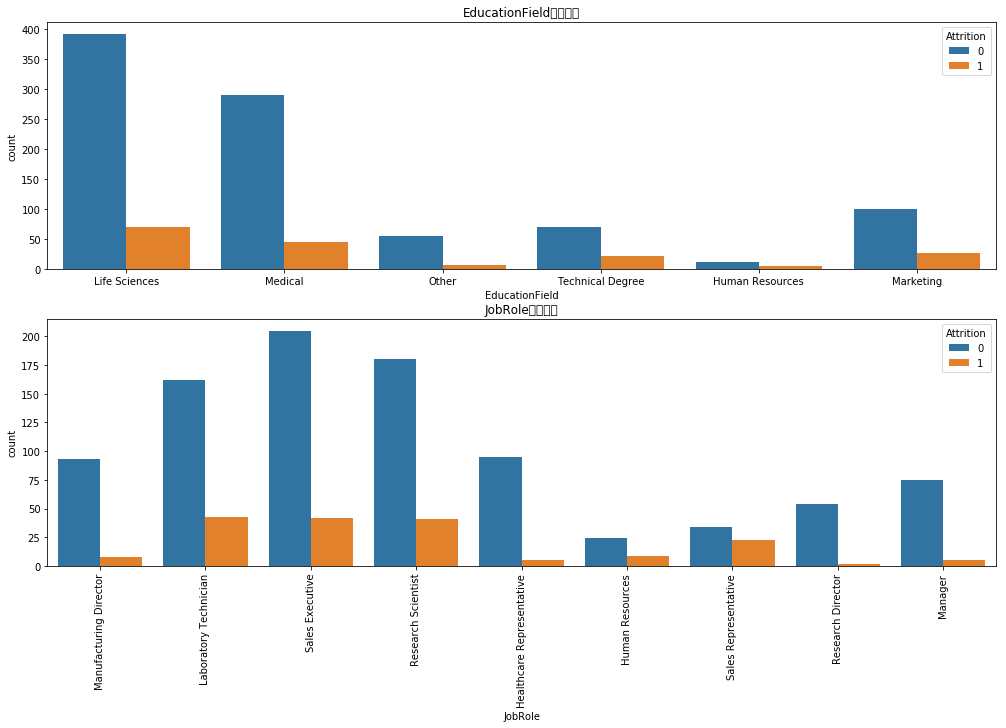

In [11]:
f,[ax1,ax2]=plt.subplots(2,1,figsize=(17,10))
sns.countplot(x='EducationField',hue='Attrition',data=train_data,ax=ax1)
sns.countplot(x='JobRole',hue='Attrition',data=train_data,ax=ax2)
ax1.set_title(u'EducationField特征分析')
ax2.set_title(u'JobRole特征分析')
plt.xticks(rotation=90)

## 多个定类变量分析

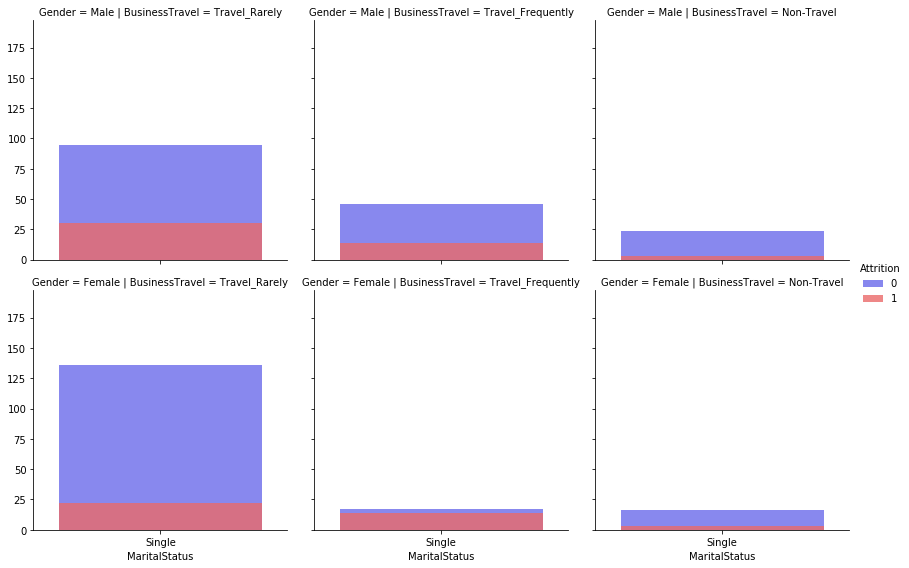

In [12]:
#在不同出差频率下，男性和女性在单身情况的数量对比
grid=sns.FacetGrid(train_data,row='Gender',col='BusinessTravel',hue='Attrition',palette='seismic',size=4)
grid.map(sns.countplot,'MaritalStatus',alpha=0.8)
grid.add_legend()
#经常出差的单身女性离职率很高

## 连续变量分析

In [13]:
#越年轻离职率相对越高；教育程度越低离职率也相对较高；
for i in train_data.columns:
    if train_data[i].dtype=='int64':
        print(i+':')
        print((train_data[train_data['Attrition'] == 1.0][i].value_counts()/train_data[i].value_counts()).sort_values(ascending = False))
        print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')


Age:
21    0.714286
19    0.625000
20    0.500000
58    0.428571
22    0.416667
23    0.400000
26    0.322581
28    0.285714
29    0.272727
31    0.270833
33    0.255319
25    0.250000
24    0.222222
30    0.187500
44    0.181818
55    0.176471
32    0.170213
39    0.166667
52    0.166667
41    0.161290
56    0.153846
53    0.153846
34    0.132075
47    0.125000
51    0.125000
46    0.120000
35    0.118644
37    0.108108
49    0.090909
36    0.072727
45    0.066667
40    0.063830
42    0.058824
27    0.052632
38    0.051282
50    0.043478
43    0.040000
18         NaN
48         NaN
54         NaN
57         NaN
59         NaN
60         NaN
Name: Age, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Attrition:
1    1.0
0    NaN
Name: Attrition, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DistanceFromHome:
12    0.428571
24    0.400000
22    0.333333
13    0.294118
27    0.272727
25    0.263158
16    0.230769
29    0.217391
20    0.210526
17    0.200000
23    0.200

(0, 19999)

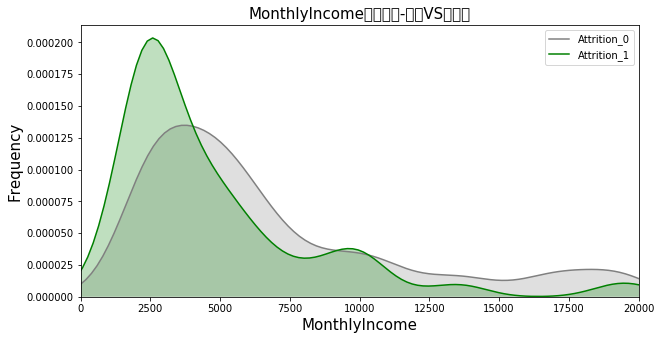

In [14]:
#工资大概在3725处的离职频率非常高，之后坡度有所下降
f,ax=plt.subplots(figsize=(10,5))
sns.kdeplot(train_data.loc[train_data['Attrition']==0,'MonthlyIncome'],color='gray',shade=True,label='Attrition_0')
sns.kdeplot(train_data.loc[train_data['Attrition']==1,'MonthlyIncome'],color='g',shade=True,label='Attrition_1')
plt.title('MonthlyIncome特征分布-离职VS非离职',fontsize=15)
plt.xlabel('MonthlyIncome',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xlim(0,train_data['MonthlyIncome'].max())

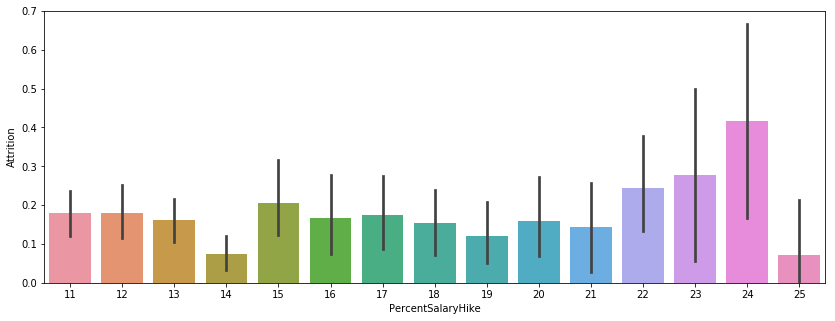

In [15]:
#工资提成的离职情况分布
plt.figure(figsize=(14,5))
sns.barplot(x='PercentSalaryHike',y='Attrition',data=train_data)

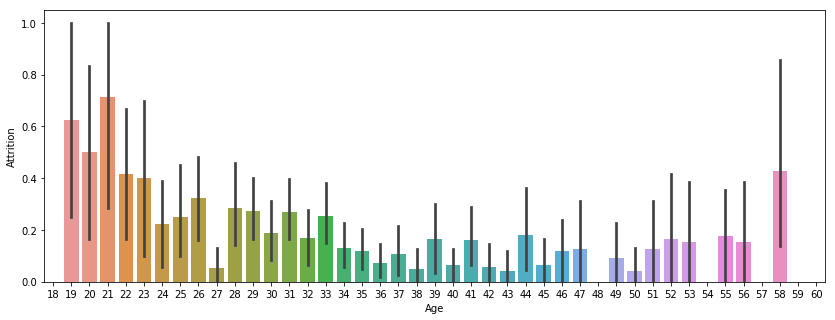

In [16]:
#年龄的离职情况分布
plt.figure(figsize=(14,5))
sns.barplot(x='Age',y='Attrition',data=train_data)

## 新变量构建

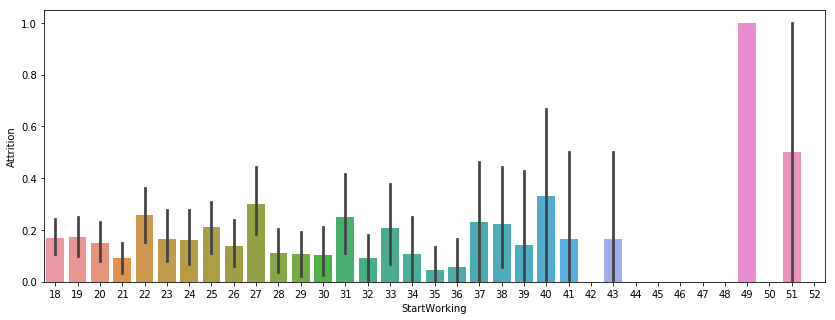

In [17]:
#开始工作年龄
data['StartWorking']=data['Age']-data['TotalWorkingYears']
plt.figure(figsize=(14,5))
sns.barplot(x='StartWorking',y='Attrition',data=data.iloc[:train_data.shape[0]])

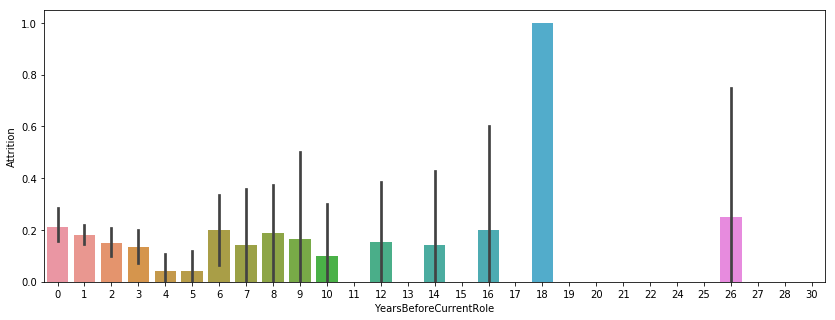

In [18]:
#晋升到目前的职位花了多长时间
data['YearsBeforeCurrentRole']=data['YearsAtCompany']-data['YearsInCurrentRole']
plt.figure(figsize=(14,5))
sns.barplot(x='YearsBeforeCurrentRole',y='Attrition',data=data.iloc[:train_data.shape[0]])

In [19]:
#根据可视化图重设年龄分组便于后续分类
def resetAge(input):
    if ((input < 24) & (input > 18)) | (input == 58):
        return 1
    elif (input == 18) | (input == 48) |(input == 54) | (input == 57) | (input > 58) :
        return 0
    else:
        return 2
#根据可视化图重设薪酬分组便于后续分类
def resetSalary(input):
    if (input>0) & (input<3725):
        return 0
    elif (input>=3725) & (input<111250):
        return 1
    else:
        return 2
#根据可视化图重设工资提高百分比分组便于后续分类
def resetPerHike(input):
    if (input>=22) & (input<25):
        return 0
    elif ((input>=11) & (input<14)) |((input>14) & (input <22)):
        return 1
    else:
        return 2
#根据可视化图重设开始工作年龄分组
def resetStart(input):
    if (input==49)|(input==51):
        return 3
    elif (input==22)|(input==27)|(input==31)|(input==40):
        return 2
    elif (input==42)|((input>43)&(input<49))|(input==50)|(input>=52):
        return 0
    else:
        return 1
#同上
def resetYearsBefore(input):
    if (input==18):
        return 3
    elif (input<=3)|((input>=6)&(input<=10))|(input==12)|(input==14)|(input==16)|(input==26):
        return 2
    elif (input==4)|(input==5):
        return 1
    else:
        return 0


In [20]:
data['Age']=data['Age'].apply(resetAge)
data['MonthlyIncome']=data['MonthlyIncome'].apply(resetSalary)
data['PercentSalaryHike']=data['PercentSalaryHike'].apply(resetPerHike)
data['StartWorking']=data['StartWorking'].apply(resetStart)
data['YearsBeforeCurrentRole']=data['YearsBeforeCurrentRole'].apply(resetYearsBefore)

## 独热编码

In [21]:
#独热编码
cata_result = pd.DataFrame()
for i in data.columns:
    if data[i].dtype == 'O':
        cata = pd.DataFrame()
        cata = pd.get_dummies(data[i],prefix=i)
        cata_result = pd.concat([cata_result,cata],axis=1)

In [22]:
#删除点object变量
for i in data.columns:
    if data[i].dtype == 'O':
        data = data.drop(i,axis=1)

In [23]:
#合并
data = pd.concat([data,cata_result],axis=1)

In [24]:
#观察处理后的数据
data.head()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,StartWorking,YearsBeforeCurrentRole,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,2,0.0,1,4,1,2,2,3,1,1,1,3,3,1,7,2,4,7,5,0,7,1,2,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0
1,0,0.0,1,4,4,3,3,3,1,7,1,3,1,1,33,2,1,5,4,1,4,1,2,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
2,2,1.0,7,3,1,1,2,3,1,1,0,4,4,0,9,3,3,9,7,0,6,1,2,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,2,0.0,1,1,4,2,4,4,1,1,1,3,3,1,21,3,3,21,6,11,8,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
4,2,1.0,1,3,1,2,1,2,0,1,1,3,1,2,1,2,3,1,0,0,0,2,2,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0


## 查看特征重要度和筛选特征

In [25]:
#是否加班和薪酬高低重要度居高
from sklearn.feature_selection import SelectKBest,f_classif
drop_columns=[]
num=train_data.shape[0]
target=train_data['Attrition'].values
features=data.drop(columns=['Attrition']).columns.tolist()
train=data.iloc[:num]
selector=SelectKBest(f_classif,k=len(features))
selector.fit(train[features],target)
scores=-np.log10(selector.pvalues_)
indices=np.argsort(scores)[::-1]
print('Features Importance')
for f in range(len(scores)):
    if scores[indices[f]]<=1.00:
        drop_columns.append(features[indices[f]])
    print('%0.2f %s'%(scores[indices[f]],features[indices[f]]))

Features Importance
18.69 OverTime_Yes
18.69 OverTime_No
10.10 MonthlyIncome
9.47 TotalWorkingYears
9.30 MaritalStatus_Single
7.75 JobLevel
7.27 YearsInCurrentRole
6.90 YearsWithCurrManager
6.50 JobRole_Sales Representative
6.18 StartWorking
5.77 YearsAtCompany
5.40 StockOptionLevel
4.56 YearsBeforeCurrentRole
4.55 PercentSalaryHike
4.53 JobSatisfaction
4.35 JobInvolvement
3.00 MaritalStatus_Divorced
2.89 EnvironmentSatisfaction
2.84 JobRole_Healthcare Representative
2.73 MaritalStatus_Married
2.48 DistanceFromHome
2.17 Department_Research & Development
2.16 BusinessTravel_Travel_Frequently
2.07 JobRole_Research Director
1.91 JobRole_Manager
1.78 Department_Sales
1.76 YearsSinceLastPromotion
1.74 JobRole_Manufacturing Director
1.71 BusinessTravel_Non-Travel
1.45 EducationField_Technical Degree
1.41 JobRole_Laboratory Technician
1.18 EducationField_Human Resources
1.10 JobRole_Human Resources
1.06 RelationshipSatisfaction
1.01 EducationField_Marketing
0.98 WorkLifeBalance
0.92 Performan

## 分类算法预测情况

### 默认情况下的分类算法

In [26]:
from sklearn import cross_validation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression

num=train_data.shape[0]
train_val_y=train_data.iloc[:num]['Attrition']
train_val_x=data.iloc[:num].drop(columns=['Attrition'])
test_x=data.iloc[num:].drop('Attrition',axis=1)

train_x,val_x,train_y,val_y=train_test_split(train_val_y,train_val_x,test_size=0.25,
                                            random_state=2)

model={}
model['rfc']=RandomForestClassifier()
model['gdbt']=GradientBoostingClassifier()
model['cart']=DecisionTreeClassifier()
model['knn']=KNeighborsClassifier()
model['svm']=svm.SVC()
model['lr']=LogisticRegression()
for i in model:
    model[i].fit(train_val_x,train_val_y)
    score=cross_validation.cross_val_score(model[i],train_val_x,train_val_y,cv=5,scoring='accuracy')
    print('%s的准确率为：%.3f(std:%.3f)'%(i,score.mean(),score.std()))
#lr最高，其次是gdbt\

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


rfc的准确率为：0.848(std:0.006)
gdbt的准确率为：0.872(std:0.013)
cart的准确率为：0.782(std:0.020)
knn的准确率为：0.827(std:0.011)
svm的准确率为：0.843(std:0.005)
lr的准确率为：0.879(std:0.016)


### 调参后的预测情况

In [27]:
#选择准确率排前四的分类算法进行调参，发现调参后的分类算法准确率均有所提高
from sklearn.model_selection import GridSearchCV
model=['rfc','gbdt','svc','lr']

temp=[]
rfc=RandomForestClassifier(random_state=0)
params={'n_estimators':[50,100,150,200,250],'max_depth':[3,5,7],'min_samples_leaf':[2,4,6]}
temp.append([rfc,params])

gbt=GradientBoostingClassifier(random_state=0)
params={'learning_rate':[0.01,0.05,0.1,0.15,0.2],'n_estimators':[100,300,500],
       'max_depth':[3,5,7]}
temp.append([gbt,params])

svc=svm.SVC()
params={'kernel':['linear','rbf','sigmoid'],'C':[1,1.2,1.4,1.5,1.8,2],
       'gamma':[0.1,0.15,0.2,0.25]}
temp.append([svc,params])

lr=LogisticRegression()
params={'C':[0.01,0.1,0.5,1,2,3,4,5,6],'solver':['newton-cg','lbfgs','sag']}
temp.append([lr,params])

for i in range(len(model)):
    best_model=GridSearchCV(temp[i][0],param_grid=temp[i][1],refit=True,cv=5).fit(train_val_x,train_val_y)
    print(model[i],':')
    print('best accuracy:%.3f'%(best_model.best_score_))
    print('best parameters:',best_model.best_params_)

rfc :
best accuracy:0.856
best parameters: {'max_depth': 7, 'min_samples_leaf': 2, 'n_estimators': 50}
gbdt :
best accuracy:0.875
best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
svc :
best accuracy:0.881
best parameters: {'C': 1.8, 'gamma': 0.1, 'kernel': 'linear'}
lr :
best accuracy:0.891
best parameters: {'C': 0.5, 'solver': 'sag'}


### 集成模型的预测情况

In [28]:
#使用集成模型中的voting
from sklearn.ensemble import VotingClassifier

models=[('rfc',RandomForestClassifier(max_depth=5,min_samples_leaf=2,n_estimators=50)),
     ('gdbt',GradientBoostingClassifier(learning_rate=0.1,max_depth=3,n_estimators=100)),
     ('svc',svm.SVC(C=1.5,gamma=0.1,kernel='linear')),
     ('lr',LogisticRegression(C=0.5,solver='sag'))]
vote=VotingClassifier(models,voting='hard')
scores=cross_validation.cross_val_score(vote,train_val_x,train_val_y,cv=5,scoring='accuracy')
print('集成模型准确率为：%.3f(std:%.3f)'%(scores.mean(),scores.std()))

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is a

集成模型准确率为：0.882(std:0.013)


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### 选择逻辑回归算法

In [29]:
#根据前面各个模型的准确率，选择了逻辑回归算法
model=LogisticRegression(C=0.5,solver='sag').fit(train_val_x,train_val_y)
score=cross_validation.cross_val_score(model,train_val_x,train_val_y,cv=10,scoring='accuracy')
result=model.predict(test_x).astype('int')

In [30]:
#最后提交数据
data_predict=pd.DataFrame(result)
data_predict['result']=result
data_predict.to_csv('sample.csv')
data_predict=pd.read_csv('sample.csv')